### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

# Models
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix,
    precision_recall_curve, auc, classification_report)


from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler

# Load datasets

### Original Dataset

In [2]:
# Define column names (since UCI does not provide them)
feature_columns = [f"feature_{i}" for i in range(590)]  # 590 features

# Load features
secom_features = pd.read_csv(
    "../secom/secom.data", 
    sep=" ", 
    names=feature_columns, 
    header=None, 
    engine='python'
)

In [3]:
# Load labels
secom_labels = pd.read_csv(
    "../secom/secom_labels.data", 
    sep=" ", 
    header=None, 
    usecols=[0]  # Only the first column contains the label
)

In [4]:
# Rename label column
secom_labels.columns = ["Label"]

# Convert labels: -1 (pass) -> 0, 1 (fail) -> 0
secom_labels["Label"] = secom_labels["Label"].replace({-1: 0, 1: 1})

# Combine features and labels into a single DataFrame
secom_data = pd.concat([secom_features, secom_labels], axis=1)

In [5]:
secom_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_581,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


### Median imputed dataset (secom_median)

In [6]:
secom_median = pd.read_csv('../secom/secom_median_imputed')

secom_median.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,1.0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,1.0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0.0
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1.0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1.0


### MICE imputed dataset (secom_MICE)

In [7]:
secom_MICE = pd.read_csv('../secom/secom_MICE_imputed')

secom_MICE.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021247,0.015558,0.005138,100.525349,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,0


# Evaluate median dataset

In [8]:
print(secom_median.shape)
print(secom_MICE.shape)

(1567, 539)
(1567, 539)


### Define data X & y

In [9]:
# Separate features and labels
X_01_median = secom_median.iloc[:, :-1].values  # Features (538 columns)
y_01_median = secom_median.iloc[:, -1].values   # Labels (1 or 0)

### Define Cross-Validation
Use StratifiedKFold to ensure the imbalanced distribution is maintained across folds.

In [10]:
# Use StratifiedKFold to maintain the imbalance in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Define Logistic Regression Model

In [11]:
# Define Logistic Regression model
lr_01_median = LogisticRegression(class_weight='balanced', random_state=42)  # Balancing classes

In [12]:
# Perform cross-validation and get predictions
y_pred_proba_01med = cross_val_predict(lr_01_median, X_01_median, y_01_median, cv=cv, method="predict_proba")[:, 1]
y_pred_01med = (y_pred_proba_01med >= 0.5).astype(int)  # Convert probabilities to class labels

/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

### Compute Evaluation Metrics

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_01_median, y_pred_01med)

# Compute Precision-Recall Curve and PR-AUC
precision, recall, _ = precision_recall_curve(y_01_median, y_pred_proba_01med)
pr_auc = auc(recall, precision)

### Visualization (Confusion Matrix + PR-AUC)

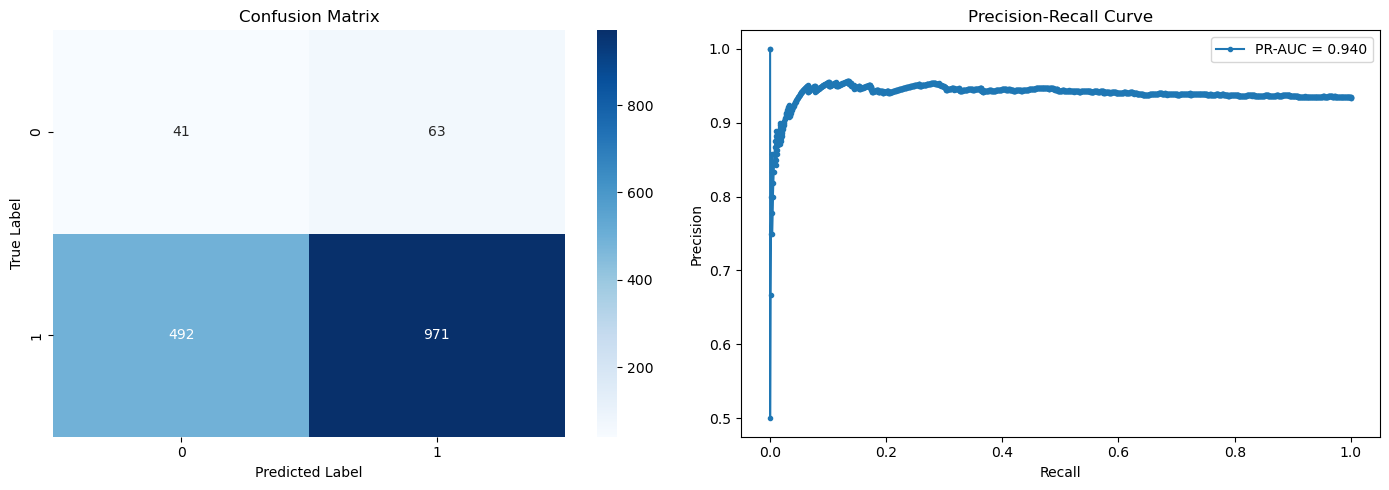

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Plot
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1], ax=axes[0])
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")
axes[0].set_title("Confusion Matrix")

# Precision-Recall Curve Plot
axes[1].plot(recall, precision, marker='.', label=f'PR-AUC = {pr_auc:.3f}')
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve")
axes[1].legend()

plt.tight_layout()
plt.show()

## Define a function for evaluation using cross validation (eval_model)

In [15]:
def eval_model(df, model, test_size=0.2, n_splits=5, threshold=0.5):
    """
    Trains and evaluates a binary classification model, tracking both training and validation PR curves.

    Parameters:
        df (pd.DataFrame): Dataset with the last column as the binary label.
        model: Machine learning model (e.g., LogisticRegression, RandomForestClassifier, XGBClassifier).
        test_size (float): Proportion of data for validation (default = 0.2).
        n_splits (int): Number of cross-validation folds.
        threshold (float): Probability threshold for classification.

    Outputs:
        - Confusion Matrix and PR Curve visualization (for both training and validation)
        - Prints PR-AUC scores and classification report
    """

    # Separate features and labels
    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values   # Labels (0 or 1)

    # Split into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    '''
    # Standardize features if using Logistic Regression
    scaler = StandardScaler()
    if "LogisticRegression" in str(model):
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
    '''

    # Train the model
    model.fit(X_train, y_train)

    # Get predictions for training and validation sets
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_val_proba = model.predict_proba(X_val)[:, 1]

    # Convert probabilities to class labels based on the threshold
    y_train_pred = (y_train_proba >= threshold).astype(int)
    y_val_pred = (y_val_proba >= threshold).astype(int)

    # Compute Confusion Matrix for validation set
    cm = confusion_matrix(y_val, y_val_pred)

    # Compute Precision-Recall Curve and PR-AUC for both sets
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
    precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)

    pr_auc_train = auc(recall_train, precision_train)
    pr_auc_val = auc(recall_val, precision_val)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Confusion Matrix Plot (Validation Set)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1], ax=axes[0])
    axes[0].set_xlabel("Predicted Label")
    axes[0].set_ylabel("True Label")
    axes[0].set_title("Validation Set Confusion Matrix")

    # Precision-Recall Curve Plot (Train & Validation)
    axes[1].plot(recall_train, precision_train, label=f'Training PR-AUC = {pr_auc_train:.3f}', linestyle="--")
    axes[1].plot(recall_val, precision_val, label=f'Validation PR-AUC = {pr_auc_val:.3f}')
    axes[1].set_xlabel("Recall")
    axes[1].set_ylabel("Precision")
    axes[1].set_title("Precision-Recall Curve (Train vs. Validation)")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # Print Classification Report for Validation Set
    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred, digits=4))

    print("PR-AUC train = ", pr_auc_train,"\nPR-AUC validation = ", pr_auc_val)

    return pr_auc_train, pr_auc_val  # Returns both PR-AUC scores for comparison


## Log Reg: LR_01_median

/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


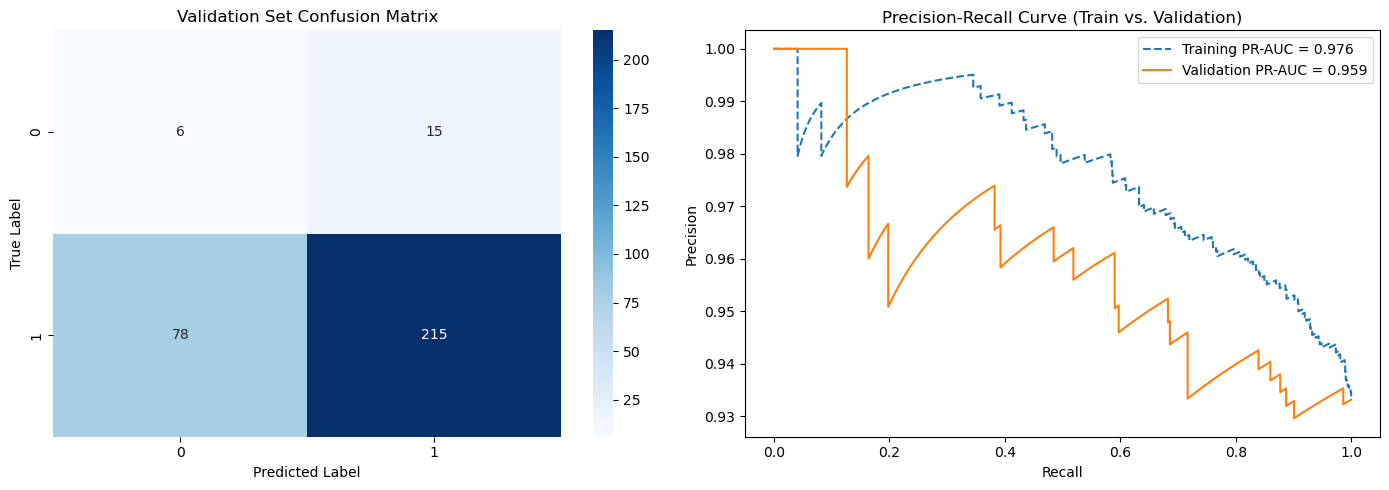

Validation Classification Report:
              precision    recall  f1-score   support

         0.0     0.0714    0.2857    0.1143        21
         1.0     0.9348    0.7338    0.8222       293

    accuracy                         0.7038       314
   macro avg     0.5031    0.5098    0.4682       314
weighted avg     0.8770    0.7038    0.7748       314

PR-AUC train =  0.9763593923855022 
PR-AUC validation =  0.9585760987917795


(0.9763593923855022, 0.9585760987917795)

In [16]:
eval_model(df = secom_median, model = lr_01_median, n_splits=5, threshold=0.5)

## Random Forest: RF_01_median

In [17]:
# Define RF model for median imputation df
rf_01_median = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

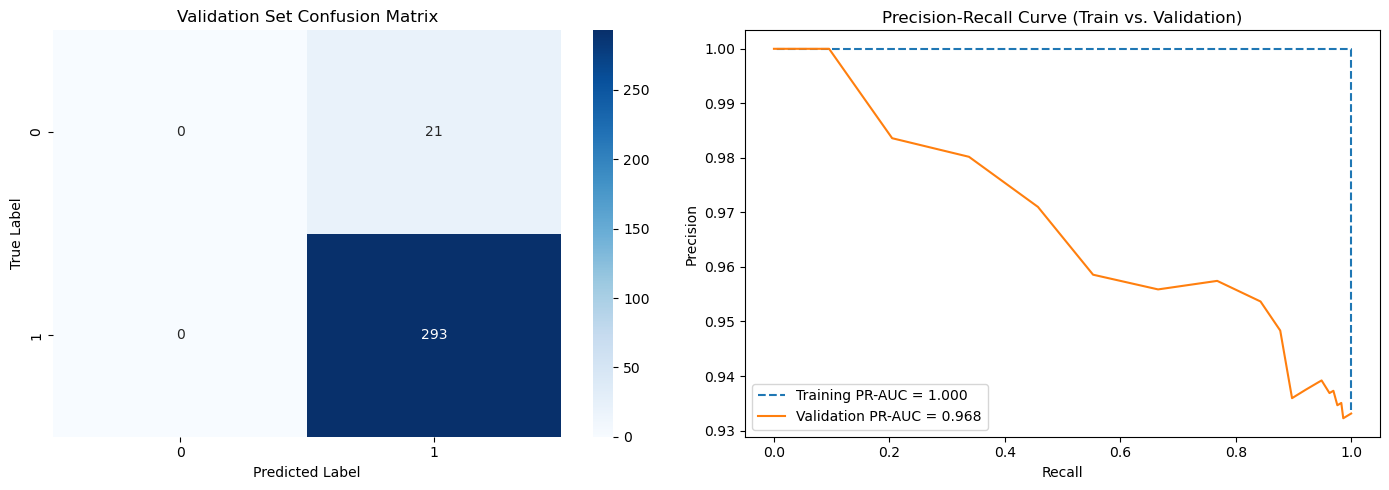

Validation Classification Report:
              precision    recall  f1-score   support

         0.0     0.0000    0.0000    0.0000        21
         1.0     0.9331    1.0000    0.9654       293

    accuracy                         0.9331       314
   macro avg     0.4666    0.5000    0.4827       314
weighted avg     0.8707    0.9331    0.9008       314

PR-AUC train =  1.0 
PR-AUC validation =  0.9684722025919716


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(1.0, 0.9684722025919716)

In [18]:
eval_model(df = secom_median, model = rf_01_median, n_splits=5, threshold=0.5)

## XGBoost: xgb_01_median

In [19]:
xgb_01_median = XGBClassifier(eval_metric='logloss', random_state=42)

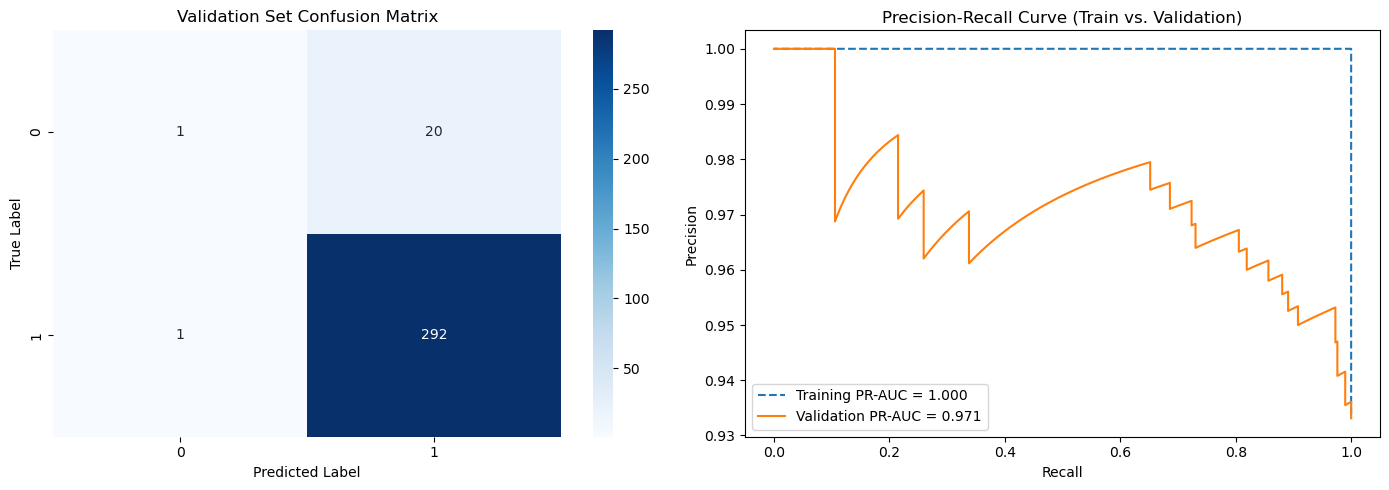

Validation Classification Report:
              precision    recall  f1-score   support

         0.0     0.5000    0.0476    0.0870        21
         1.0     0.9359    0.9966    0.9653       293

    accuracy                         0.9331       314
   macro avg     0.7179    0.5221    0.5261       314
weighted avg     0.9067    0.9331    0.9065       314

PR-AUC train =  1.0 
PR-AUC validation =  0.9713624148265783


(1.0, 0.9713624148265783)

In [20]:
eval_model(df = secom_median, model = xgb_01_median, n_splits=5, threshold=0.5)

# Evaluate MICE dataset

## Log Reg: model_lr

In [21]:
model_lr = LogisticRegression(class_weight='balanced', random_state=42)  # Balancing classes

/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


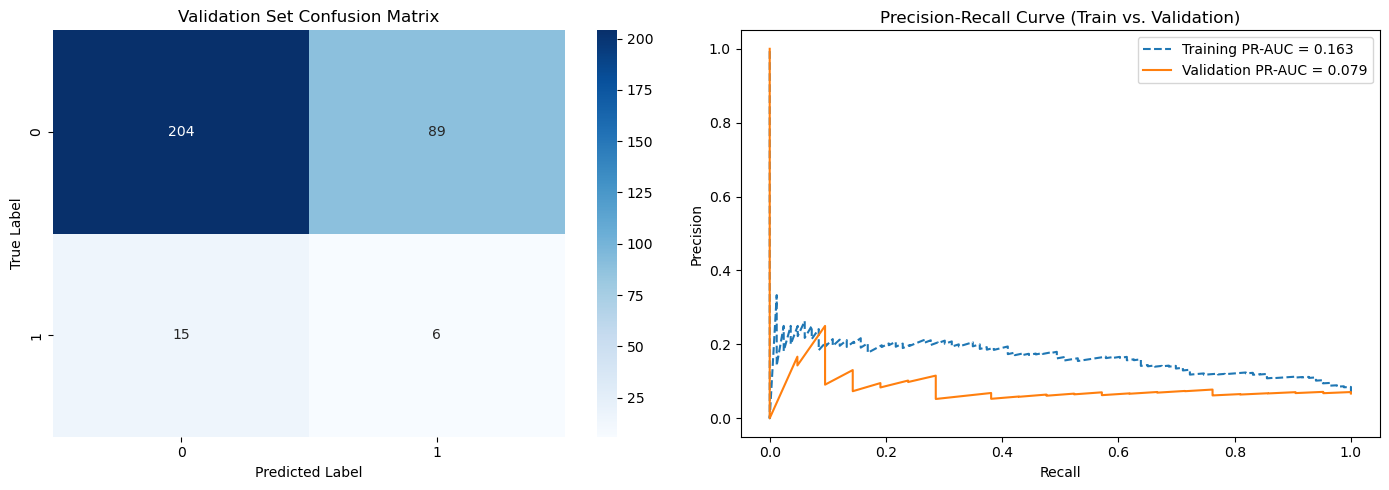

Validation Classification Report:
              precision    recall  f1-score   support

           0     0.9315    0.6962    0.7969       293
           1     0.0632    0.2857    0.1034        21

    accuracy                         0.6688       314
   macro avg     0.4973    0.4910    0.4502       314
weighted avg     0.8734    0.6688    0.7505       314

PR-AUC train =  0.1632718341658014 
PR-AUC validation =  0.07909041824846741


(0.1632718341658014, 0.07909041824846741)

In [22]:
lr_mice_performance = eval_model(df = secom_MICE, model = model_lr, n_splits=5, threshold=0.5)
lr_mice_performance

## Random Forest: model_rf

In [23]:
model_rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)

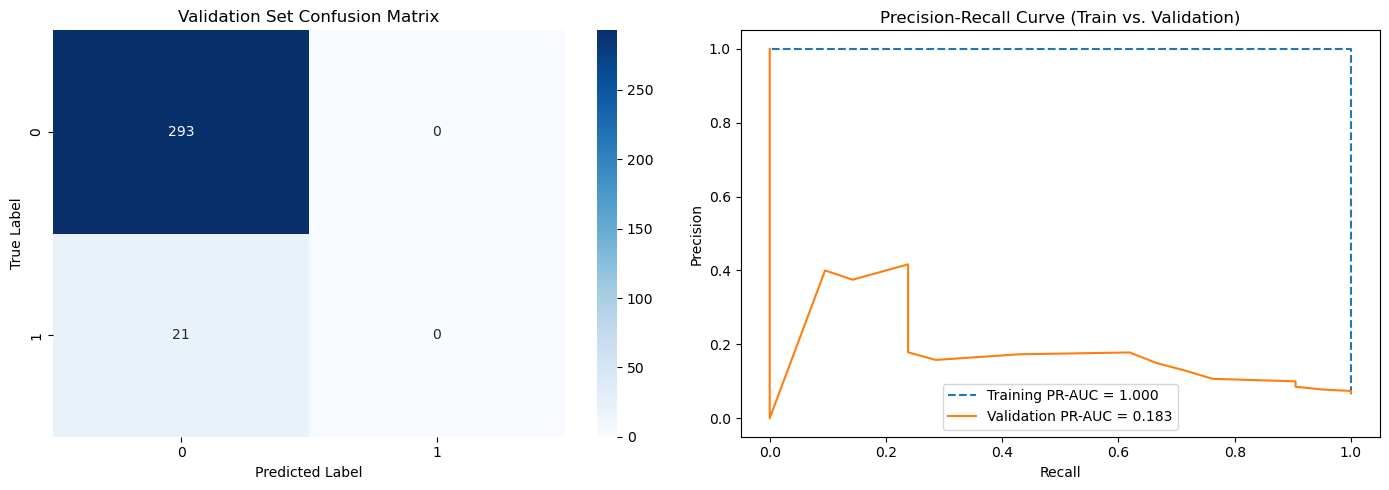

Validation Classification Report:
              precision    recall  f1-score   support

           0     0.9331    1.0000    0.9654       293
           1     0.0000    0.0000    0.0000        21

    accuracy                         0.9331       314
   macro avg     0.4666    0.5000    0.4827       314
weighted avg     0.8707    0.9331    0.9008       314

PR-AUC train =  1.0 
PR-AUC validation =  0.18256612004397266


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(1.0, 0.18256612004397266)

In [24]:
rf_mice_performance = eval_model(df = secom_MICE, model = model_rf, n_splits=5, threshold=0.5)
rf_mice_performance 

## XGBoost: model_xgb

In [25]:
model_xgb = XGBClassifier(eval_metric='logloss', random_state=42)

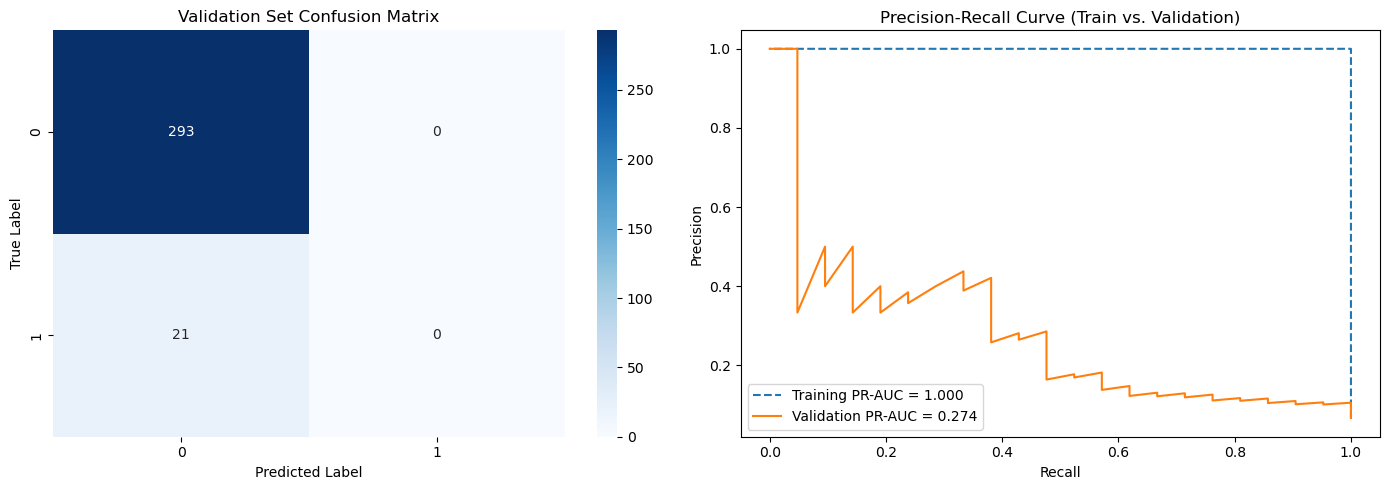

Validation Classification Report:
              precision    recall  f1-score   support

           0     0.9331    1.0000    0.9654       293
           1     0.0000    0.0000    0.0000        21

    accuracy                         0.9331       314
   macro avg     0.4666    0.5000    0.4827       314
weighted avg     0.8707    0.9331    0.9008       314

PR-AUC train =  1.0 
PR-AUC validation =  0.27358174629552023


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(1.0, 0.27358174629552023)

In [26]:
xgb_mice_performance = eval_model(df = secom_MICE, model = model_xgb, n_splits=5, threshold=0.5)
xgb_mice_performance

# Takeaway from comparing training on each imputed dataset
overtraining may possibly be a problem, but validation performance using the MICE imputed dataset is slightly better when compared to training on the median imputed dataset. 

# Standardization

In [27]:
scaler = StandardScaler()
secom_scaled = pd.DataFrame(scaler.fit_transform(secom_MICE))

secom_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
0,0.224281,0.849839,-0.434892,0.037125,-0.050591,0.0,-0.564182,0.257582,0.510453,1.128261,...,-0.135520,0.118510,-0.204902,-0.093235,-0.197126,-0.017129,-0.104048,-0.050662,0.009109,-0.266621
1,1.107103,-0.382771,1.017522,0.155531,-0.060055,0.0,0.196462,0.308497,0.457658,0.022447,...,-0.460054,0.530003,0.406667,0.444678,0.385046,-0.960163,0.411918,0.250157,1.156683,-0.266621
2,-1.114177,0.799218,-0.479878,0.683745,-0.047917,0.0,-0.905990,0.247400,-0.259814,0.327043,...,-0.590505,-1.262931,0.022253,0.014347,0.029820,2.991161,3.627117,3.321449,-0.179154,3.750641
3,-0.350335,-0.198740,-0.050430,-1.092825,-0.051301,0.0,0.500945,0.003011,0.343946,-0.765528,...,-0.645708,-0.322376,-0.292269,-0.362192,-0.283429,-0.101884,-0.178860,-0.308260,-0.275252,-0.266621
4,0.242115,0.087656,1.117704,-0.153568,-0.047503,0.0,-0.116576,0.186302,0.545650,-0.149715,...,-0.454486,-5.906925,26.867217,27.071380,26.913331,-0.101884,-0.178860,-0.308260,-0.275252,-0.266621


In [28]:
# Separate features (X) and label (y)
X = secom_MICE.iloc[:, :-1]  # All columns except the last one (features)
y = secom_MICE.iloc[:, -1]   # Last column (label)

# Initialize and apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with original column names
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Reattach the label to the scaled DataFrame
secom_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Check the first few rows
secom_scaled.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_577,feature_582,feature_583,feature_584,feature_585,feature_586,feature_587,feature_588,feature_589,Label
0,0.224281,0.849839,-0.434892,0.037125,-0.050591,0.0,-0.564182,0.257582,0.510453,1.128261,...,-0.135520,0.118510,-0.204902,-0.093235,-0.197126,-0.017129,-0.104048,-0.050662,0.009109,0
1,1.107103,-0.382771,1.017522,0.155531,-0.060055,0.0,0.196462,0.308497,0.457658,0.022447,...,-0.460054,0.530003,0.406667,0.444678,0.385046,-0.960163,0.411918,0.250157,1.156683,0
2,-1.114177,0.799218,-0.479878,0.683745,-0.047917,0.0,-0.905990,0.247400,-0.259814,0.327043,...,-0.590505,-1.262931,0.022253,0.014347,0.029820,2.991161,3.627117,3.321449,-0.179154,1
3,-0.350335,-0.198740,-0.050430,-1.092825,-0.051301,0.0,0.500945,0.003011,0.343946,-0.765528,...,-0.645708,-0.322376,-0.292269,-0.362192,-0.283429,-0.101884,-0.178860,-0.308260,-0.275252,0
4,0.242115,0.087656,1.117704,-0.153568,-0.047503,0.0,-0.116576,0.186302,0.545650,-0.149715,...,-0.454486,-5.906925,26.867217,27.071380,26.913331,-0.101884,-0.178860,-0.308260,-0.275252,0


## Log Reg: model_lr 02

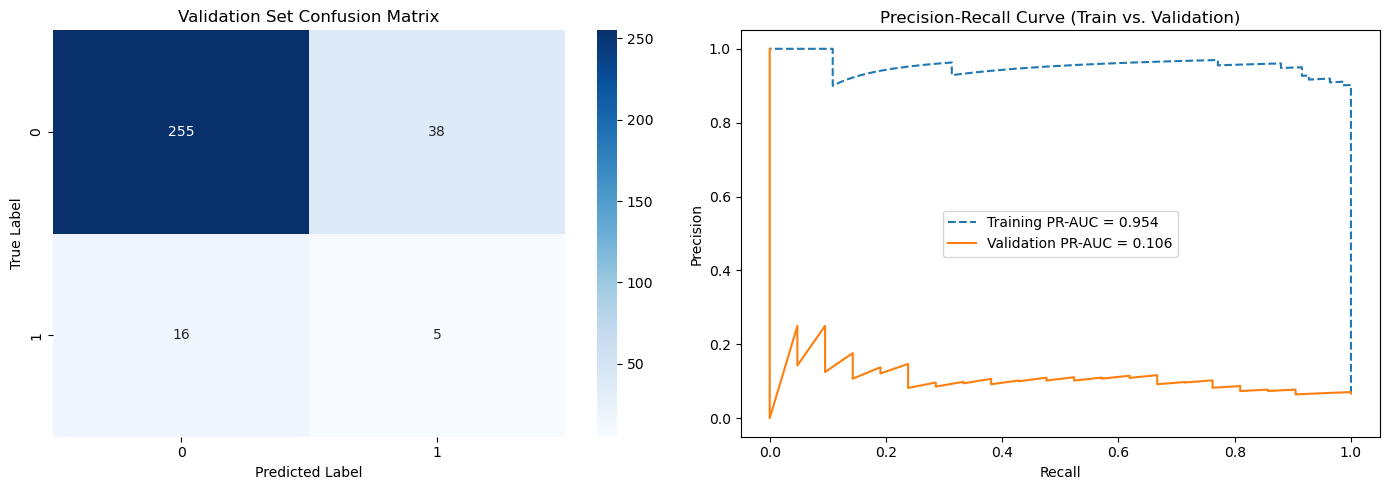

Validation Classification Report:
              precision    recall  f1-score   support

           0     0.9410    0.8703    0.9043       293
           1     0.1163    0.2381    0.1562        21

    accuracy                         0.8280       314
   macro avg     0.5286    0.5542    0.5303       314
weighted avg     0.8858    0.8280    0.8542       314

PR-AUC train =  0.9537759842042555 
PR-AUC validation =  0.10552602905468284


(0.9537759842042555, 0.10552602905468284)

In [29]:
lr_scaled_performance = eval_model(df = secom_scaled, model = model_lr, n_splits=5, threshold=0.5)
lr_scaled_performance

In [30]:
lr_02_change = lr_scaled_performance[1] - lr_mice_performance[1]
lr_02_change

0.026435610806215426

## Rand Forest: model_rf 02

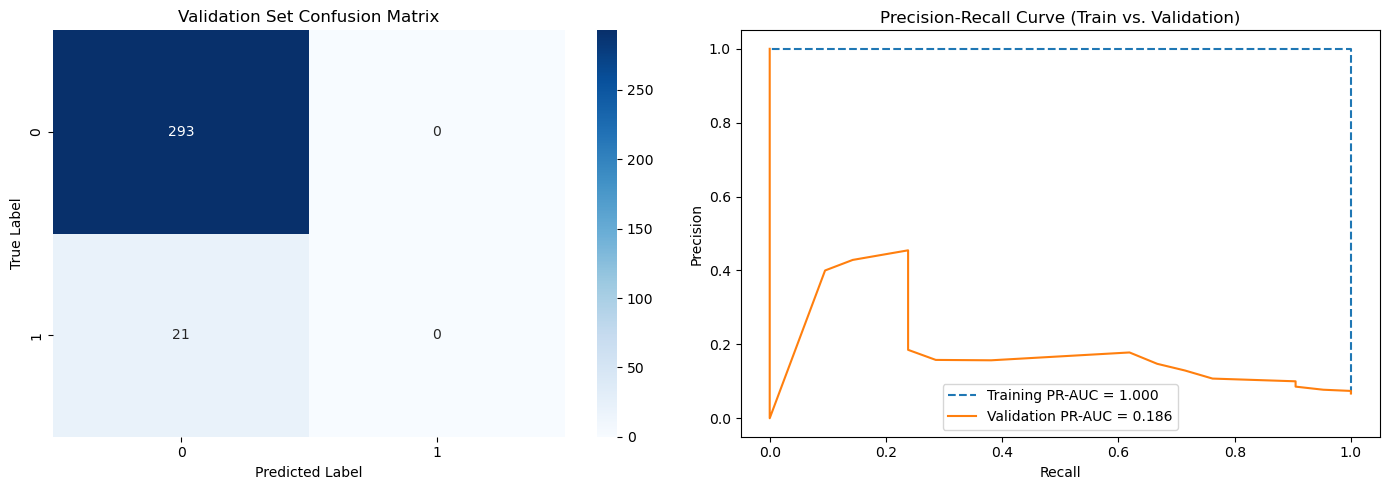

Validation Classification Report:
              precision    recall  f1-score   support

           0     0.9331    1.0000    0.9654       293
           1     0.0000    0.0000    0.0000        21

    accuracy                         0.9331       314
   macro avg     0.4666    0.5000    0.4827       314
weighted avg     0.8707    0.9331    0.9008       314

PR-AUC train =  1.0 
PR-AUC validation =  0.18612057361876644


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(1.0, 0.18612057361876644)

In [31]:
rf_scaled_performance = eval_model(df = secom_scaled, model = model_rf, n_splits=5, threshold=0.5)
rf_scaled_performance

In [32]:
rf_02_change = rf_scaled_performance[1] - rf_mice_performance[1]
rf_02_change

0.003554453574793781

## XGBoost: model_xgb 02

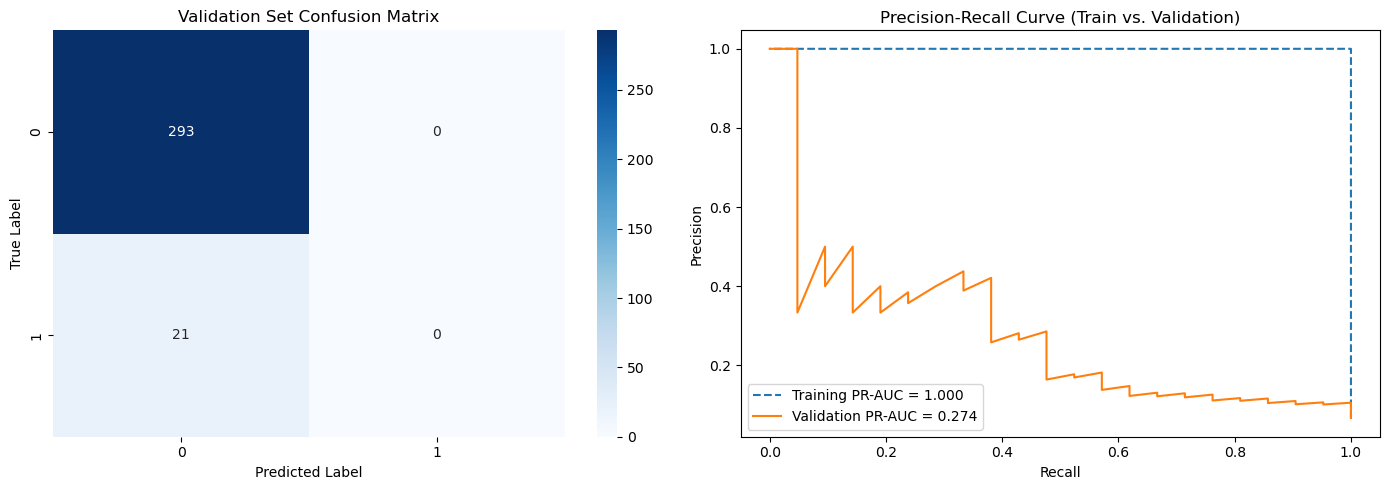

Validation Classification Report:
              precision    recall  f1-score   support

           0     0.9331    1.0000    0.9654       293
           1     0.0000    0.0000    0.0000        21

    accuracy                         0.9331       314
   macro avg     0.4666    0.5000    0.4827       314
weighted avg     0.8707    0.9331    0.9008       314

PR-AUC train =  1.0 
PR-AUC validation =  0.27358174629552023


/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/reese_quinto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(1.0, 0.27358174629552023)

In [33]:
xgb_scaled_performance = eval_model(df = secom_scaled, model = model_xgb, n_splits=5, threshold=0.5)
xgb_scaled_performance

In [34]:
xgb_02_change = xgb_scaled_performance[1] - xgb_mice_performance[1]
xgb_02_change

0.0